In [1]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc as pm

/home/yannick/bin/anaconda3/envs/py27/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /home/yannick/bin/anaconda3/envs/py27/lib/python2.7/argparse.pyc, but /home/yannick/bin/anaconda3/envs/py27/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [2]:
def gen_sample(n, mus, sigmas):
    return np.array([mus + stats.norm.rvs(size = n, loc = 0, scale = sigmas[i]) for i in np.arange(len(sigmas)) ])

def gen_mus_sigma(nb_stateux, nb_samples):
    return (stats.uniform.rvs(size=nb_samples, loc=0, scale=200), stats.uniform.rvs(size=nb_stateux, loc=0, scale=40))

nb_stateux = 7
sample_length = 10

(mus, sigma) = gen_mus_sigma(nb_stateux, sample_length)
sample = gen_sample(sample_length, mus, sigma)
print len(sample), len(sample[0])
print mus
print sigma
print sample
print [np.mean([sample[i, j] for i in np.arange(len(sigma))]) for j in np.arange(len(mus))]


7 10
[  42.43699278   86.85551215   34.49162067  137.05079751  133.35113158
  110.28046665   65.36707022   93.60611658  154.28519232  128.21921755]
[ 22.27576246  11.68893532  26.77699482  29.34880184   7.71825691
  17.66864189  34.5350888 ]
[[  45.28241063  135.18496206   38.25831703  127.76393106  136.79096407
   102.10114501   62.7005945    65.43834857  176.99420878  122.02793086]
 [  33.53293577   84.91552885   24.04953035  136.08348562  132.33854999
   117.80942805   52.61061546  109.59303707  171.68205355  119.95470198]
 [  96.37959752   67.46876061   28.46249505   77.50142455   84.01428953
    54.54266562   81.0451395    90.33632835  192.9787181   138.81949459]
 [  21.87887966  105.78089698   72.53855438  111.75733574  105.15705791
   106.10231702   58.63042012   78.84338906  125.31825092  129.13680834]
 [  34.12760506   83.88457055   39.90417004  140.09689046  142.3844998
   105.79219659   63.43170252   82.87435466  144.73056292  131.25464062]
 [  39.74002413   93.05909423   59

In [3]:
v_mus = np.array([pm.Uniform("mu%d" % i, lower=0, upper=200) for i in np.arange(sample_length)])
v_sigmas = [pm.Uniform("sigma%d" % k, lower=0, upper=40) for k in np.arange(nb_stateux)]

v_taus = [pm.Lambda("tau%d" % k, lambda sigma=v_sigmas[k]: 1/sigma**2) for k in np.arange(nb_stateux)]

x = np.array([[pm.Normal("x%d_%d" % (k,i), mu=v_mus[i], tau=v_taus[k], 
                         observed=True, value=np.array(sample[k,i])) for i in np.arange(sample_length)]
              for k in np.arange(nb_stateux)])

print x.shape

(7, 10)


In [4]:
mcmc = pm.MCMC([v_mus, v_sigmas, v_taus, x])
mcmc.sample(10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 12.9 sec

36.3008291838
90.4419353356
39.1203986955
137.25746653
137.568908028
106.201778177
63.0710837271
86.9623857408
152.018010147
127.563812647
[36.300829183787954, 90.441935335645539, 39.120398695471906, 137.25746653037098, 137.56890802826496, 106.20177817671959, 63.071083727083114, 86.962385740801778, 152.01801014697725, 127.56381264663764]


/home/yannick/bin/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


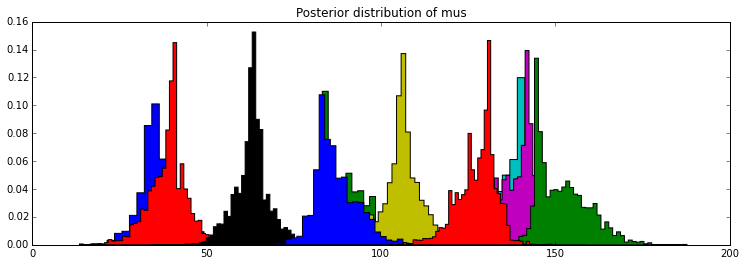

In [5]:
figsize(12.5, 4)
plt.title("Posterior distribution of mus")
for i in np.arange(sample_length):
    plt.hist(mcmc.trace("mu%d" % i)[:], bins=50, histtype="stepfilled", normed=True)
    plt.legend()
    plt.xlim((0,200))
    print (mcmc.trace("mu%d" % i)[:].mean())

print [mcmc.trace("mu%d" % j)[:].mean() for j in np.arange(sample_length)]

In [6]:
x = np.array([[1,2], [1,3], [1,4]])
print x
y = np.array([10, 20, 30])
print y
print x+y.reshape(len(y), 1)
print type(x), len(x), x.shape

[[1 2]
 [1 3]
 [1 4]]
[10 20 30]
[[11 12]
 [21 23]
 [31 34]]
<type 'numpy.ndarray'> 3 (3, 2)
